In [1]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("/content/Viral_Social_Media_Trends.csv")

# UNDERSTAND THE DATA

In [3]:
df.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [4]:
df.tail()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
4995,Post_4996,YouTube,#Education,Video,Japan,4258236,381509,59209,4674,High
4996,Post_4997,Instagram,#Education,Video,UK,4841525,166266,54841,4832,Medium
4997,Post_4998,YouTube,#Fashion,Shorts,USA,2004080,32401,75229,33875,Low
4998,Post_4999,Instagram,#Gaming,Shorts,Canada,2221665,46996,12954,42832,Low
4999,Post_5000,Instagram,#Fashion,Reel,Japan,2224007,72744,29945,46381,Low


In [5]:
df.columns

Index(['Post_ID', 'Platform', 'Hashtag', 'Content_Type', 'Region', 'Views',
       'Likes', 'Shares', 'Comments', 'Engagement_Level'],
      dtype='object')

In [6]:
df.info() # Check column types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


In [7]:
df.describe()  # See summary statistics

,Views,Likes,Shares,Comments
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2.494066e+06,251475.029800,50519.562000,24888.393800
std,1.459490e+06,144349.583384,29066.362671,14284.504319
min,1.266000e+03,490.000000,52.000000,18.000000
25%,1.186207e+06,126892.250000,25029.000000,12305.250000
50%,2.497373e+06,249443.000000,50839.500000,25004.000000
75%,3.759781e+06,373970.750000,75774.250000,37072.750000
max,4.999430e+06,499922.000000,99978.000000,49993.000000


In [8]:
print("First 5 rows:\n", df.head())
print("\nInfo:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary stats:\n", df.describe())

First 5 rows:
   Post_ID   Platform     Hashtag Content_Type     Region    Views   Likes  \
0  Post_1     TikTok  #Challenge        Video         UK  4163464  339431   
1  Post_2  Instagram  #Education       Shorts      India  4155940  215240   
2  Post_3    Twitter  #Challenge        Video     Brazil  3666211  327143   
3  Post_4    YouTube  #Education       Shorts  Australia   917951  127125   
4  Post_5     TikTok      #Dance         Post     Brazil    64866  171361   

   Shares  Comments Engagement_Level  
0   53135     19346             High  
1   65860     27239           Medium  
2   39423     36223           Medium  
3   11687     36806              Low  
4   69581      6376           Medium  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null

In [9]:
df.shape

(5000, 10)

In [10]:
df.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


# **DATA Cleaning**

In [11]:
df.isna().sum()

,0
Post_ID,0
Platform,0
Hashtag,0
Content_Type,0
Region,0
Views,0
Likes,0
Shares,0
Comments,0
Engagement_Level,0


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['Engagement_Level'].value_counts()

,count
Engagement_Level,
Low,1729
High,1673
Medium,1598


In [14]:
df['Platform'].value_counts()

,count
Platform,
YouTube,1324
TikTok,1260
Instagram,1212
Twitter,1204


In [15]:
df['Hashtag'].value_counts()

,count
Hashtag,
#Fitness,536
#Education,525
#Challenge,507
#Comedy,505
#Dance,496
#Music,493
#Tech,491
#Fashion,487
#Viral,481


In [16]:
# fitness,challenge
# music,dance,comedy
# tech,gaming,education
# fashion,viral


# Define the mapping dictionary
hashtag_groups = {
    'fitness,challenge': ['#Fitness', '#Challenge'],
    'music,dance,comedy': ['#Music', '#Dance', '#Comedy'],
    'tech,gaming,education': ['#Tech', '#Gaming', '#Education'],
    'fashion,viral': ['#Fashion', '#Viral']
}

# Create a reverse mapping: hashtag -> group
hashtag_to_group = {}
for group, tags in hashtag_groups.items():
    for tag in tags:
        hashtag_to_group[tag] = group

# Apply the mapping to the DataFrame
df['Hashtag'] = df['Hashtag'].map(hashtag_to_group)

# Optional: check value counts after grouping
print(df['Hashtag'].value_counts())


# one hot encode

Hashtag
tech,gaming,education    1495
music,dance,comedy       1494
fitness,challenge        1043
fashion,viral             968
Name: count, dtype: int64


In [17]:
df['Content_Type'].value_counts()

,count
Content_Type,
Live Stream,855
Post,853
Reel,841
Tweet,836
Video,828
Shorts,787


In [18]:
mapping={
    'Shorts':0,
    'Reel':0,
    'Tweet':0,
    'Post':0,
    'Live Stream':1,

    'Video':1
}
# 0 for short content 1 for long content
df['Content_Type']=df['Content_Type'].map(mapping)

In [19]:
df['Content_Type'].value_counts()

,count
Content_Type,
0,3317
1,1683


In [20]:
df['Post_ID'].nunique()

5000

In [21]:
# since there is 5000 different post ids and it doesnt affect the target we can drop Post_ID column
df.drop(columns=['Post_ID'],inplace=True)

In [22]:
df['Region'].value_counts()

,count
Region,
USA,677
Canada,658
UK,647
Brazil,641
India,617
Australia,602
Japan,592
Germany,566


In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Fit and transform the 'Region' column
df['Region'] = le.fit_transform(df['Region'])

In [24]:
df['Region'].value_counts()

,count
Region,
7,677
2,658
6,647
1,641
4,617
0,602
5,592
3,566


In [25]:
df['Engagement_Level'].value_counts()


,count
Engagement_Level,
Low,1729
High,1673
Medium,1598


In [26]:
mapping={
    'Low':0,
    'Medium':1,
    'High':2,
}
# 0 for short content 1 for long content
df['Engagement_Level']=df['Engagement_Level'].map(mapping)

In [27]:
df['Engagement_Level'].value_counts()


,count
Engagement_Level,
0,1729
2,1673
1,1598


In [28]:
# One-hot encode 'Hashtag' and 'Platform' columns
df = pd.get_dummies(df, columns=['Hashtag', 'Platform'],drop_first=True,dtype='int')

# drop_first=True :This parameter is used to avoid multicollinearity by dropping the first category in each column being one-hot encoded.
# Display the resulting DataFrame
df.head()


,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level,"Hashtag_fitness,challenge","Hashtag_music,dance,comedy","Hashtag_tech,gaming,education",Platform_TikTok,Platform_Twitter,Platform_YouTube
0,1,6,4163464,339431,53135,19346,2,1,0,0,1,0,0
1,0,4,4155940,215240,65860,27239,1,0,0,1,0,0,0
2,1,1,3666211,327143,39423,36223,1,1,0,0,0,1,0
3,0,0,917951,127125,11687,36806,0,0,0,1,0,0,1
4,0,1,64866,171361,69581,6376,1,0,1,0,1,0,0


In [29]:
df.shape

(5000, 13)

In [30]:
df.head()

,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level,"Hashtag_fitness,challenge","Hashtag_music,dance,comedy","Hashtag_tech,gaming,education",Platform_TikTok,Platform_Twitter,Platform_YouTube
0,1,6,4163464,339431,53135,19346,2,1,0,0,1,0,0
1,0,4,4155940,215240,65860,27239,1,0,0,1,0,0,0
2,1,1,3666211,327143,39423,36223,1,1,0,0,0,1,0
3,0,0,917951,127125,11687,36806,0,0,0,1,0,0,1
4,0,1,64866,171361,69581,6376,1,0,1,0,1,0,0


In [36]:
df.columns

Index(['Content_Type', 'Region', 'Views', 'Likes', 'Shares', 'Comments',
       'Engagement_Level', 'Hashtag_fitness,challenge',
       'Hashtag_music,dance,comedy', 'Hashtag_tech,gaming,education',
       'Platform_TikTok', 'Platform_Twitter', 'Platform_YouTube'],
      dtype='object')

<ipython-input-32-9ea0ceac7a84>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Engagement_Level', palette='viridis')


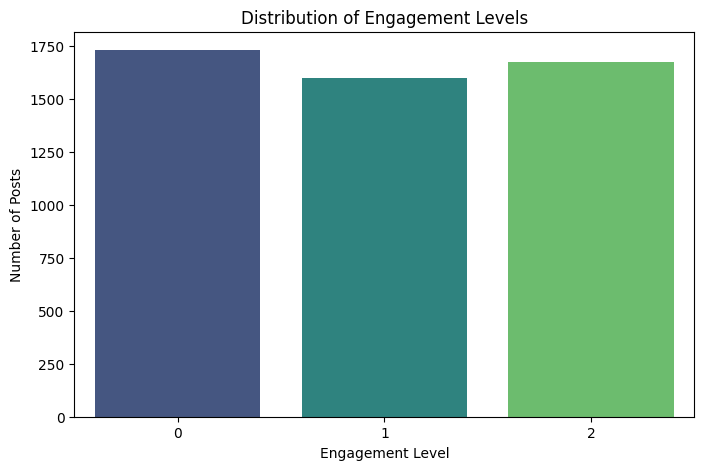

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Engagement_Level', palette='viridis')
plt.title('Distribution of Engagement Levels')
plt.xlabel('Engagement Level')
plt.ylabel('Number of Posts')
plt.show()


<ipython-input-37-f8b1305e501f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Platform_YouTube', palette='pastel')


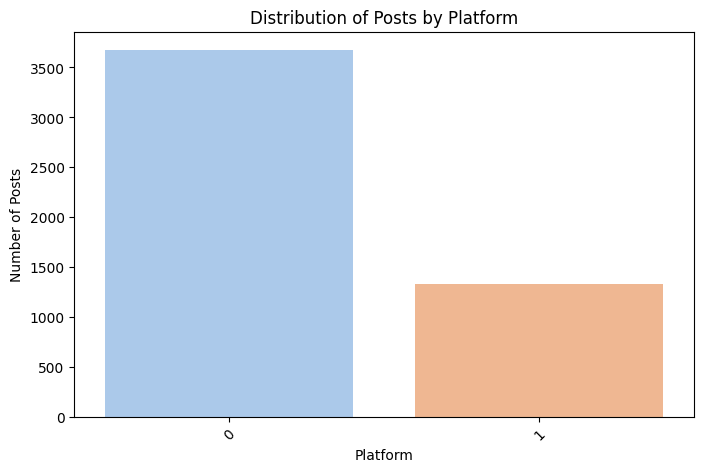

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Platform_YouTube', palette='pastel')
plt.title('Distribution of Posts by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()


<ipython-input-39-168febc84279>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Region', order=df['Region'].value_counts().index, palette='coolwarm')


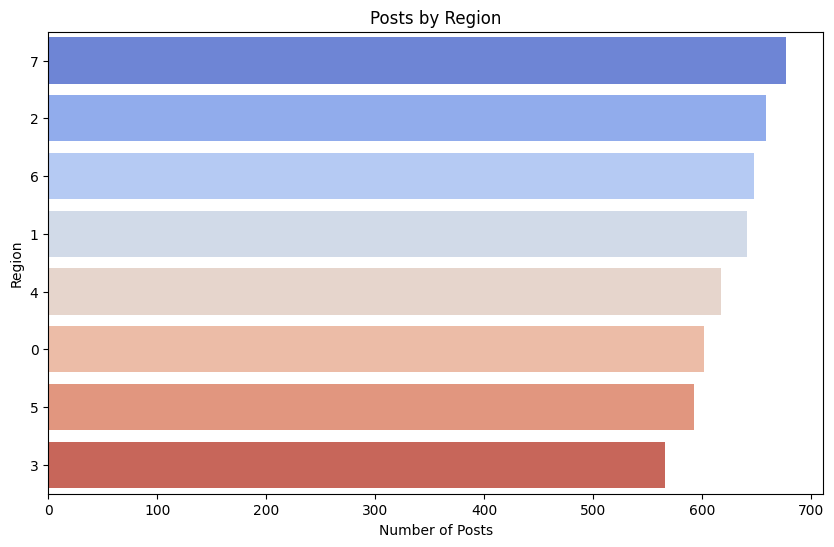

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Region', order=df['Region'].value_counts().index, palette='coolwarm')
plt.title('Posts by Region')
plt.xlabel('Number of Posts')
plt.ylabel('Region')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
# dropping columns with low correlation with target and less important
df.drop(columns=['Platform_TikTok',	'Platform_Twitter',	'Platform_YouTube','Region','Content_Type'],inplace=True)

In [ ]:
df.shape

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(15, 8))
# sns.set(style="whitegrid")

# Create a boxplot for each numeric column
df.plot(kind='box', subplots=True, layout=(2, 4), figsize=(15, 8), patch_artist=True)

plt.suptitle("Box Plots of all columns (Outlier Detection)", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# from the above box plot:there is no outliers in any columns


In [ ]:
df['Hashtag_fitness,challenge'].value_counts()

In [ ]:
# scaling large values to small values

from sklearn.preprocessing import MinMaxScaler

# Columns to scale
cols_to_scale = ['Views', 'Likes', 'Shares', 'Comments']

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Check the scaled values
df[cols_to_scale].head()


In [ ]:
# scaling
df.shape

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('Engagement_Level', axis=1)
y = df['Engagement_Level']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


In [ ]:
# Select only numerical features
numeric_feats = df.select_dtypes(include=[np.number]).columns

# Calculate skewness
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Show features with high skewness (e.g., skewness > 0.75)
high_skew = skewed_feats[abs(skewed_feats) > 0.75]
print("Skewed features:\n", high_skew)

# Apply Box-Cox or log1p transformation
for feat in high_skew.index:
    # You can use log1p (log(1 + x)) if the data has 0 or positive values
    if (df[feat] >= 0).all():
        df[feat] = np.log1p(df[feat])
    else:
        # Use PowerTransformer (Yeo-Johnson can handle negative values)
        pt = PowerTransformer(method='yeo-johnson')
        df[feat] = pt.fit_transform(df[[feat]])

print("Skewness handled successfully.")

# **RandomForest and XGboost**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ----- RANDOM FOREST -----
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# ----- XGBOOST -----
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# ----- EVALUATION FUNCTION -----
def evaluate_model(name, y_true, y_pred):
    print(f"\n🔍 Evaluation for {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision (macro):", precision_score(y_true, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_true, y_pred, average='macro'))
    print("F1 Score (macro):", f1_score(y_true, y_pred, average='macro'))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ----- EVALUATE BOTH MODELS -----
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)


# **Logistic Regression and K-Nearest Neighbors**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- MODELS ----------
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
svm_model = SVC(kernel='rbf', probability=True)  # probability=True allows for future ROC curve
knn_model = KNeighborsClassifier(n_neighbors=5)

# ---------- FIT MODELS ----------
logreg_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# ---------- PREDICTIONS ----------
logreg_preds = logreg_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
knn_preds = knn_model.predict(X_test)

# ---------- EVALUATION FUNCTION ----------
def evaluate_model(name, y_true, y_pred):
    print(f"\n🔍 Evaluation for {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision (macro):", precision_score(y_true, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_true, y_pred, average='macro'))
    print("F1 Score (macro):", f1_score(y_true, y_pred, average='macro'))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion matrix plot
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ---------- EVALUATE ALL ----------
evaluate_model("Logistic Regression", y_test, logreg_preds)
evaluate_model("SVM", y_test, svm_preds)
evaluate_model("K-Nearest Neighbors", y_test, knn_preds)


#Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('lr', LogisticRegression(max_iter=1000))
], voting='soft')

voting_clf.fit(X_train, y_train)
ensemble_preds = voting_clf.predict(X_test)


# Evaluate Voting Classifier
def evaluate_model(name, y_true, y_pred):
    print(f"\n🔍 Evaluation for {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision (macro):", precision_score(y_true, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_true, y_pred, average='macro'))
    print("F1 Score (macro):", f1_score(y_true, y_pred, average='macro'))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix Plot
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Run evaluation
evaluate_model("Voting Classifier (Ensemble)", y_test, ensemble_preds)